In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Apple_data.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2015-01-02 00:00:00-05:00,27.847500,27.860001,26.837500,27.332500,24.320433,212818400,0.0,0.0
1,2015-01-05 00:00:00-05:00,27.072500,27.162500,26.352501,26.562500,23.635277,257142000,0.0,0.0
2,2015-01-06 00:00:00-05:00,26.635000,26.857500,26.157499,26.565001,23.637506,263188400,0.0,0.0
3,2015-01-07 00:00:00-05:00,26.799999,27.049999,26.674999,26.937500,23.968958,160423600,0.0,0.0
4,2015-01-08 00:00:00-05:00,27.307501,28.037500,27.174999,27.972500,24.889904,237458000,0.0,0.0


In [4]:
df1 = data.reset_index()['Close']

In [5]:
training_size = int(len(df1)*0.8)
train_data = df1[:training_size]
test_data = df1[training_size:]

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_data_scaled = scaler.fit_transform(np.array(train_data).reshape(-1,1))
test_data_scaled = scaler.transform(np.array(test_data).reshape(-1, 1))

In [7]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [8]:
time_step = 125
X_train, y_train = create_dataset(train_data_scaled, time_step)
X_test, ytest = create_dataset(test_data_scaled, time_step)

In [9]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Input,  Dropout

In [11]:
model = Sequential()
model.add(Input(shape=(time_step, 1)))  
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.3))  # Increased from 0.2 → 0.3
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.3))  # Increased from 0.2 → 0.3
model.add(LSTM(64))
model.add(Dropout(0.3))  # Increased from 0.2 → 0.3
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 125, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 125, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 125, 64)        │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 125, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,009 (324.25 KB)

 Trainable params: 83,009 (324.25 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, ytest), 
                    epochs=100, batch_size=64, verbose=1)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step - loss: 0.0873 - val_loss: 0.0358
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - loss: 0.0050 - val_loss: 0.0341
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - loss: 0.0037 - val_loss: 0.0158
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 290ms/step - loss: 0.0031 - val_loss: 0.0116
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - loss: 0.0030 - val_loss: 0.0294
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - loss: 0.0032 - val_loss: 0.0065
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - loss: 0.0030 - val_loss: 0.0058
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - loss: 0.0029 - val_loss: 0.0154
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - loss: 0.0029 - val_loss: 0.0100
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 189ms/step - loss: 0.0025 - val_loss: 0.0103
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - loss: 0.0033 - val_loss: 0.0114
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6

In [13]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(ytest.reshape(-1, 1))

In [16]:
rmse_train = np.sqrt(mean_squared_error(y_train_actual, train_predict))
rmse_test = np.sqrt(mean_squared_error(y_test_actual, test_predict))
mae_train = mean_absolute_error(y_train_actual, train_predict)
mae_test = mean_absolute_error(y_test_actual, test_predict)

In [17]:
print(f"Train RMSE: {rmse_train}, Test RMSE: {rmse_test}")
print(f"Train MAE: {mae_train}, Test MAE: {mae_test}")

Train RMSE: 2.9408613031980226, Test RMSE: 9.983421828919143
Train MAE: 1.8554373843744436, Test MAE: 7.950933773473573


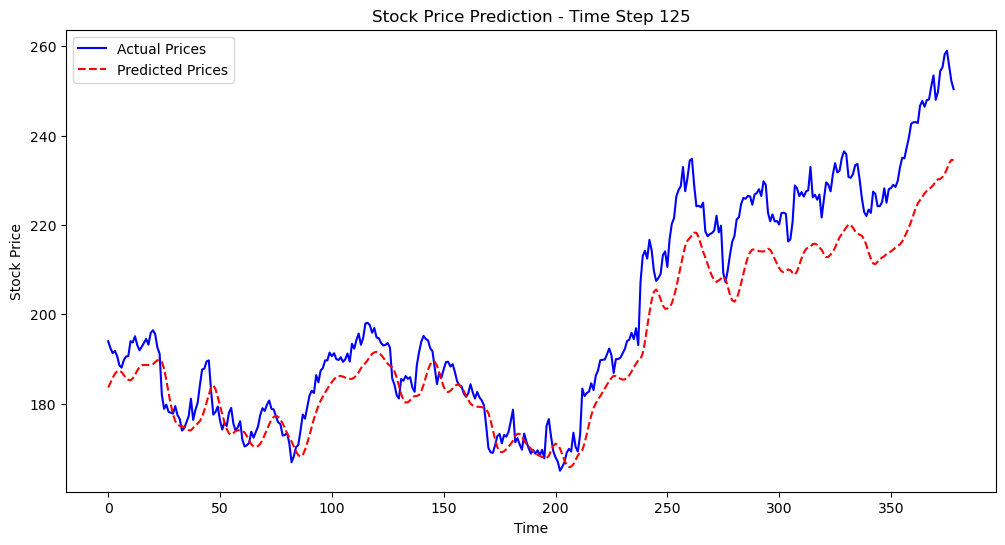

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label="Actual Prices", color="blue")
plt.plot(test_predict, label="Predicted Prices", color="red", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.title(f"Stock Price Prediction - Time Step {time_step}")
plt.show()